# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Annisa Fitrana
- **Email:** 03.annisafitriana@gmail.com
- **ID Dicoding:** MS060D5X0565

## Menentukan Pertanyaan Bisnis

- Bagaimana rata rata penyewaan sepeda setiap bulannya?
- Pada musim apa penyewaan sepeda paling banyak?
- Apakah penyewaan sepeda lebih tinggi pada hari kerja atau akhir pekan?

## Import Semua Packages/Library yang Digunakan

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st


## Data Wrangling

### Gathering Data

In [ ]:
import pandas as pd

data = pd.read_csv("day.csv")
data.head()

In [ ]:
import pandas as pd

dataJam = pd.read_csv("hour.csv")
dataJam.head()

**Insight:**
- Memahami struktur data dan nama kolom.
- Melihat apakah ada format yang aneh atau tidak sesuai.

### Assessing Data

In [ ]:
# assessing data => ngecheck missing values
(data.isnull().sum(), dataJam.isnull().sum())

**Insight:**
- Jika tidak ada missing values (semua 0), berarti data lengkap.

In [ ]:
# assessing data => ngecheck duplicate
data.duplicated().sum(), dataJam.duplicated().sum()

**Insight:**
- Jika tidak ada duplicate data (semua 0), berarti data sudah unik.

In [ ]:
# assessing data => ngecheck outlier / pencilan
import numpy as np

def detect_all_outliers_iqr(data):
    outlier_counts = {}

    for column in data.select_dtypes(include=[np.number]).columns:  # Hanya kolom numerik
        q25, q75 = np.percentile(data[column], 25), np.percentile(data[column], 75)
        iqr = q75 - q25
        cut_off = iqr * 1.5
        minimum, maximum = q25 - cut_off, q75 + cut_off

        outliers = data[(data[column] < minimum) | (data[column] > maximum)]
        outlier_counts[column] = len(outliers)

    return outlier_counts

outliers_data = detect_all_outliers_iqr(data)
outliers_dataJam = detect_all_outliers_iqr(dataJam)

print("Outlier di data:")
print(outliers_data)

print("\nOutlier di dataJam:")
print(outliers_dataJam)

hasil : Outlier di data:
{'instant': 0, 'season': 0, 'yr': 0, 'mnth': 0, 'holiday': 21, 'weekday': 0, 'workingday': 0, 'weathersit': 0, 'temp': 0, 'atemp': 0, 'hum': 2, 'windspeed': 13, 'casual': 44, 'registered': 0, 'cnt': 0}

Outlier di dataJam:
{'instant': 0, 'season': 0, 'yr': 0, 'mnth': 0, 'hr': 0, 'holiday': 500, 'weekday': 0, 'workingday': 0, 'weathersit': 3, 'temp': 0, 'atemp': 0, 'hum': 22, 'windspeed': 342, 'casual': 1192, 'registered': 680, 'cnt': 505}

**Insight:**
- Bisa melihat berapa banyak outlier di setiap kolom.
- Bisa mengecek apakah outlier terjadi di variabel penting.
- Jika outlier terlalu banyak, mungkin perlu dilakukan imputation

### Cleaning Data

In [ ]:
import pandas as pd
import numpy as np

def impute_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    minimum = Q1 - (1.5 * IQR)
    maximum = Q3 + (1.5 * IQR)

    minimum = np.floor(minimum) if np.issubdtype(df[column].dtype, np.integer) else minimum
    maximum = np.ceil(maximum) if np.issubdtype(df[column].dtype, np.integer) else maximum

    df.loc[df[column] > maximum, column] = maximum
    df.loc[df[column] < minimum, column] = minimum

    return df

#Implutation outlier dari data Hari
for col in data.select_dtypes(include=[float, int]).columns:
    data = impute_outliers_iqr(data, col)

#Implutation outlier dari data Jam
for col in dataJam.select_dtypes(include=[float, int]).columns:
    dataJam = impute_outliers_iqr(dataJam, col)


**Insight:**
-  Setelah cleaning untuk outlier, Distribusi data lebih stabil
- Statistik lebih seimbang
- Penyewaan sepeda lebih mudah dianalisis
-Data lebih siap untuk Machine Learning

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
# eksplorasi parameter statistik
print("📊 Statistik Deskriptif untuk dataHari:")
print(dataHari.select_dtypes(include=['number']).describe())

print("\n📊 Statistik Deskriptif untuk dataJam:")
print(dataJam.select_dtypes(include=['number']).describe())

**Insight:**
- Dapat mengetahui rata rata penyewaan sepeda per hari dan per jam
- Perbandingan jumlah penyewaan sepeda tergantung pada suhu dan musim
- Pola penyewaan sepeda, apakah working day mempengaruhi secara signifikan

## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [ ]:
# Visualisasi data per bulan
import pandas as pd
import matplotlib.pyplot as plt

data_hari = pd.read_csv("day.csv")

data_hari["dteday"] = pd.to_datetime(data_hari["dteday"])

monthly_trend = data_hari.groupby("mnth")["cnt"].mean()

# Visualisasi data
plt.figure(figsize=(10, 5))
plt.plot(monthly_trend, marker="o", linestyle="-", color="b")
plt.xticks(ticks=range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "Mei", "Jun", "Jul", "Agu", "Sep", "Okt", "Nov", "Des"])
plt.title("Rata-rata Penyewaan Sepeda per Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Penyewa")
plt.grid(True)
plt.show()

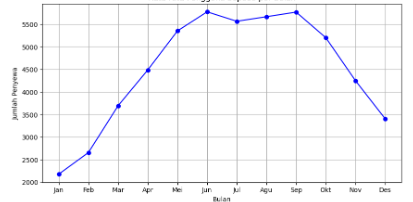

### Pertanyaan 2:

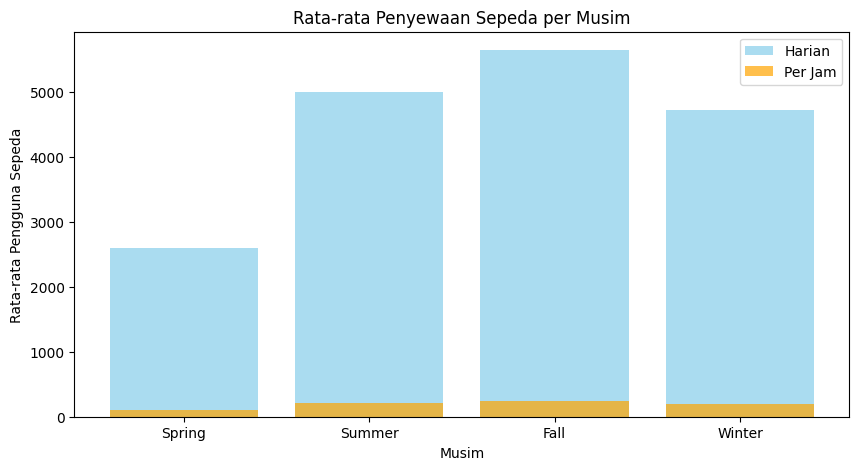

In [5]:
Visualisasi data permusim
import matplotlib.pyplot as plt
season_labels = ["Spring", "Summer", "Fall", "Winter"]

avg_users_hari = [2604, 4992, 5644, 4728]  # Harian
avg_users_jam = [111, 208, 236, 198]  # Per jam


plt.figure(figsize=(10, 5))

# Data Hari
plt.bar(season_labels, avg_users_hari, color="skyblue", alpha=0.7, label="Harian")

# Data Jam
plt.bar(season_labels, avg_users_jam, color="orange", alpha=0.7, label="Per Jam")


plt.title("Rata-rata Penyewaan Sepeda per Musim")
plt.xlabel("Musim")
plt.ylabel("Rata-rata Pengguna Sepeda")
plt.legend()
plt.show()

# - Spring (1 - Musim Semi)
# - Summer (2 - Musim Panas)
# ️- Fall (3 - Musim Gugur)
# - Winter (4 - Musim Dingin)

### Pertanyaan 3:

In [ ]:
# Visualisasi data pada workingday dan libur
workday_effect = data_hari.groupby("workingday")[["casual", "registered"]].mean()

workday_effect.plot(kind="bar", stacked=True, figsize=(8, 5), color=["orange", "blue"])
plt.xticks(ticks=[0, 1], labels=["Akhir Pekan / Libur", "Hari Kerja"], rotation=0)
plt.title("Perbandingan Penggunaan Sepeda pada Hari Kerja dan Akhir Pekan")
plt.ylabel("Rata-rata Penyewa")
plt.legend(["Casual", "Registered"])
plt.show()

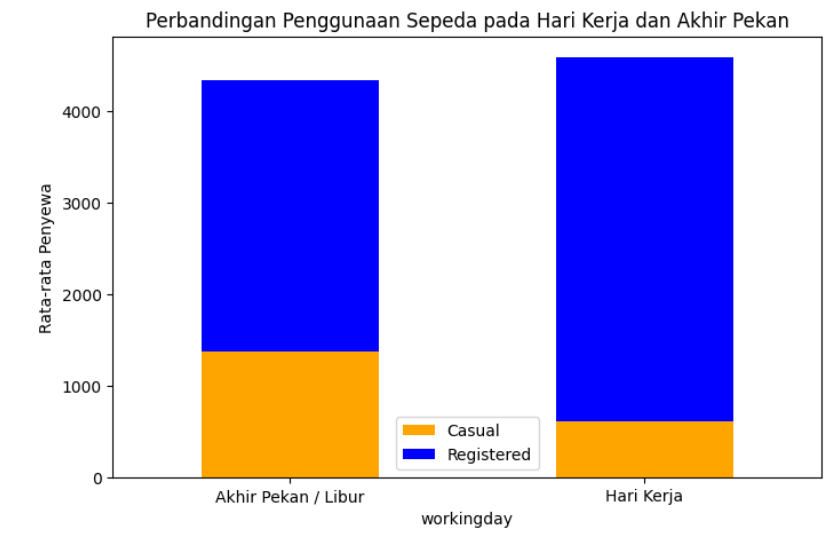

**Insight:**
- Melihat pola dan perbandingan penyewaan setiap bulannya
- Musim yang berbeda mempengaruhi jumlah penyewa di setiap dan dan harinya
- Pola penyewaan sepeda yang lebih tinggi pada workingday atau tidak
- Perbandingan antara penyewa terdaftar dan tidak

## Analisis Lanjutan (Opsional)

In [ ]:
# Load data hour.csv
data_jam = pd.read_csv("hour.csv")

# Group by jam
hourly_trend = data_jam.groupby("hr")["cnt"].mean()

# Kapan jam sibuk penggunaan sepeda
plt.figure(figsize=(10, 5))
plt.plot(hourly_trend, marker="o", linestyle="-", color="g")
plt.xticks(ticks=range(0, 24))
plt.title("Tren Penyewaan Sepeda Berdasarkan Jam")
plt.xlabel("Jam")
plt.ylabel("Jumlah Penyewa")
plt.grid(True)
plt.show()


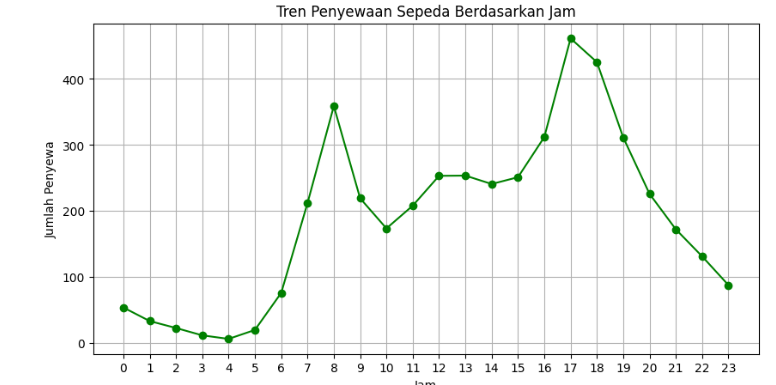

In [ ]:
import seaborn as sns

# Group berdasarkan cuaca (weathersit)
weather_effect = data_hari.groupby("weathersit")["cnt"].mean()

# Visualisasi
plt.figure(figsize=(7, 5))
sns.barplot(x=weather_effect.index, y=weather_effect.values, palette="coolwarm")
plt.xticks(ticks=[0, 1, 2, 3], labels=["Clear", "Mist", "Light Snow/Rain", "Heavy Rain/Snow"])
plt.title("Pengaruh Cuaca terhadap Penyewaan Sepeda")
plt.ylabel("Rata-rata Jumlah Penyewa")
plt.show()


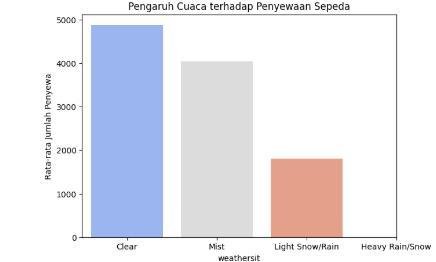

## Conclusion

- rata rata penyewaan di bulan juni dan september lebih tinggi dibandingkan penyewaan di bulan lainnya

- Pada musim gugur dan panas jumlah penyewa lebih banyak sesuai pada bulan

- Pada hari kerja penyewa lebih tinggi untuk yang sudah terdaftar atau langganan, namun pada hari libur yang blm terdaftar lebih banyak, kemungkinan yang menyewa adalah pendatang atau turis

---Pertanyaan Analisis Lanjutan---
- Pada malam hari banyak penyewa yang kemungkinan untuk bersantai atau sekedar berjalan jalan, namun di jam 8 memiliki statik penyewa yang cukup banyak dibandingkan jam pagi lainnya yang kemungkinan adalah orang yang berangkat ke suatu tempat

- Di cuaca cerah memiliki jumlah penyewa yang sangat banyak karena situasi cocok untuk bersepeda